### IBM Learning

To try and visualize circuit, I suggest the [Composer](https://learning.quantum.ibm.com/)

Other tutorial and information on Qiskit are available on [IBM Learning](https://learning.quantum.ibm.com/) and on Qiskit [webpage](https://www.ibm.com/quantum/qiskit)

### Install and set up Qiskit
https://docs.quantum.ibm.com/start/install

```console
!pip install qiskit
!pip install qiskit-ibm-runtime
```

If you intend to use visualization functionality or Jupyter notebooks, it is recommended to install Qiskit with the extra visualization support. Note that zsh users need to put 'qiskit[visualization]' in single quotes.


```console
!pip install 'qiskit[visualization]'
```


#### Check your installation

In [24]:
import qiskit
qiskit.__version__

'1.0.1'

#### Circuit building

When creating a circuit, you'll usually create a new ```QuantumCircuit``` object, then add instructions to it in sequence.

In [2]:
from qiskit import QuantumCircuit

numQubit = 2
numBit = 2
qc = QuantumCircuit(numQubit, numBit)


We draw the circuit with the method `draw` of `QuantumCircuit`

In [3]:

# qc.draw('mpl')
a = qc.draw()
print(a)

     
q_0: 
     
q_1: 
     
c: 2/
     



We add the gates (methods of `QuantumCircuit`)
  - `.x(qubit)`
  - `.h(qubit)`
  - `.cx(control qubit, target qubit)`
  - `.rx(theta, qubit)`
  - `.crx(theta, control qubit, target qubit)`


In [4]:
qc.barrier()
qc.x(0)
qc.x(1)
qc.cx(1,0)


qc.draw()

░ ┌───┐┌───┐
q_0: ─░─┤ X ├┤ X ├
      ░ ├───┤└─┬─┘
q_1: ─░─┤ X ├──■──
      ░ └───┘     
c: 2/═════════════

We add the measurements (method of `QuantumCircuit`)
  - `.measure(qubit, cbit)`

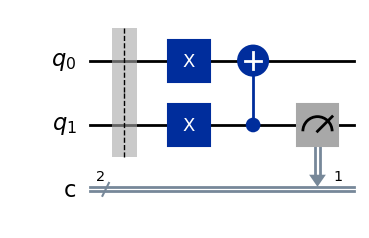

In [5]:
qc.measure(1,1)

qc.draw('mpl')

We can also add classical controlled operation

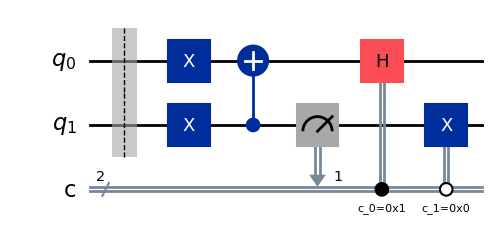

In [6]:
qc.h(0).c_if(0,1)
qc.x(1).c_if(1,0)

qc.draw('mpl')

Quantum bits can be referred to by names, using `QuantumRegister` `ClassicalRegister`

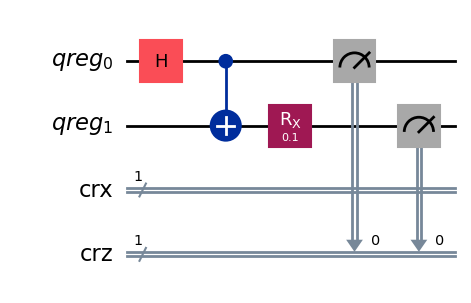

In [7]:
from qiskit import QuantumRegister, ClassicalRegister

crx = ClassicalRegister(1, 'crx')
crz = ClassicalRegister(1, 'crz')
qr = QuantumRegister(2, 'qreg')

qc = QuantumCircuit(qr,crx,crz)

qc.h(qr[0])
qc.cx(qr[0], qr[1])
qc.rx(0.1, qr[1])
qc.measure(qr[0],crz[0])
qc.measure(qr[1],crz[0])

qc.draw('mpl')

We can use name or index together

In [8]:
qra = QuantumRegister(2, 'qa')
qrb = QuantumRegister(2, 'qb')
cr = ClassicalRegister(2, 'creg')
qc = QuantumCircuit(qra, qrb, cr)
qc.cx(qra[0], qra[1])
qc.cy(qrb[0], qrb[1])
qc.cx(0, 1)
qc.cy(2, 3)
qc.measure(0, 0)
qc.draw()

┌─┐
  qa_0: ──■────■──┤M├
        ┌─┴─┐┌─┴─┐└╥┘
  qa_1: ┤ X ├┤ X ├─╫─
        └───┘└───┘ ║ 
  qb_0: ──■────■───╫─
        ┌─┴─┐┌─┴─┐ ║ 
  qb_1: ┤ Y ├┤ Y ├─╫─
        └───┘└───┘ ║ 
creg: 2/═══════════╩═
                   0

### Circuit Simulation

We can simulate the circuit in 3 ways:
- *Statevector simulator*: output the complex vector of amplitudes
- *Unitary simulator*: output the complex matrix representing the transformation performed by your circuit
- *Sampler simulator*: compute circuit output probabilities 

#### Statevector simulator

In [9]:
from qiskit.quantum_info import Statevector
import math


qc = QuantumCircuit(1)
qc.x(0)

Statevector(qc)


Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


#### Operator Simulator

The `Operator` class is used in Qiskit to represent matrix operators acting on a quantum system. 

It has several methods to build composite operators using tensor products of smaller operators, and to compose operators.

We can define manually operators

In [10]:
from qiskit.quantum_info import Operator

XX = Operator([[0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0]])
XX

Operator([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [11]:
circ = QuantumCircuit(2)
circ.append(XX, [0, 1])
circ.draw()

┌──────────┐
q_0: ┤0         ├
     │  Unitary │
q_1: ┤1         ├
     └──────────┘

We can obtain the operator representation of a generic circuit

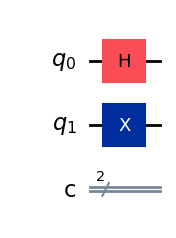

In [12]:
circ = QuantumCircuit(2, 2)
circ.h(0)
circ.x(1)
circ.draw('mpl')

In [13]:


O = Operator(circ)
O

Operator([[ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
            0.70710678+0.j],
          [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
           -0.70710678+0.j],
          [ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
            0.        +0.j],
          [ 0.70710678+0.j, -0.70710678+0.j,  0.        +0.j,
            0.        +0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [14]:
print(O.dim)
print(O.data)
print(O.output_dims())
print(O.input_dims())

(4, 4)
[[ 0.        +0.j  0.        +0.j  0.70710678+0.j  0.70710678+0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j -0.70710678+0.j]
 [ 0.70710678+0.j  0.70710678+0.j  0.        +0.j  0.        +0.j]
 [ 0.70710678+0.j -0.70710678+0.j  0.        +0.j  0.        +0.j]]
(2, 2)
(2, 2)


#### Sampler primitive 

We start from this circuit

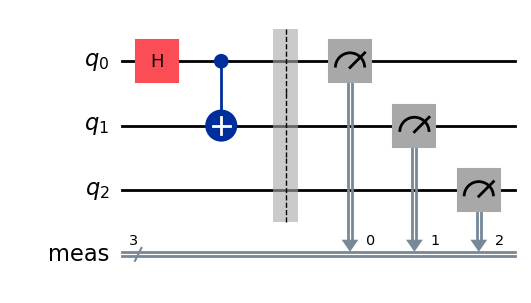

In [15]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0,1)
qc.measure_all()
qc.draw("mpl")

First we initialize the `Sampler` creating a `qiskit.primitives.Sampler` instance.

In [16]:
from qiskit.primitives import Sampler
sampler = Sampler()


*Run and get results*
Now that you have defined your sampler, run it by calling the `qiskit.primitives.Sampler.run` method, which returns an instance of `qiskit.providers.JobV1`. 

You can get the results from the job (as a `qiskit.primitives.SamplerResult` object) with the `qiskit.providers.JobV1.result` method.

In [17]:
job = sampler.run(qc)
result = job.result()
print(result.quasi_dists[0].binary_probabilities())

{'000': 0.4999999999999999, '011': 0.4999999999999999}


##### Change run options

Your workflow might require tuning primitive run options, such as the number of shots.

By default, the reference `qiskit.primitives.Sampler` class performs an exact statevector calculation based on the `qiskit.quantum_info.Statevector` class. 
However, this can be modified to include shot noise if the number of shots is set. For reproducibility purposes, a seed will also be set in the following examples.

There are two main ways of setting options in the `qiskit.primitives.Sampler`:

1. Set keyword arguments in the `qiskit.primitives.Sampler.run` method.
2. Modify `qiskit.primitives.Sampler` options.

##### Set keyword arguments 

If you only want to change the settings for a specific run, it can be more convenient to set the options inside the `qiskit.primitives.Sampler.run` method. You can do this by passing them as keyword arguments.


In [18]:
job = sampler.run(qc, shots=100000)
result = job.result()
result

SamplerResult(quasi_dists=[{0: 0.49879, 3: 0.50121}], metadata=[{'shots': 100000}])


If you prefer to change the options of an already-defined `qiskit.primitives.Sampler`, you can use `qiskit.primitives.Sampler.set_options` and introduce the new options as keyword arguments.


In [19]:
sampler.set_options(shots=2048, seed=123)
 
job = sampler.run(qc)
result = job.result()
print(result)

SamplerResult(quasi_dists=[{0: 0.5205078125, 3: 0.4794921875}], metadata=[{'shots': 2048}])


If you prefer to define a new `qiskit.primitives.Sampler` with new options, we can use a dictionary like the following:

In [20]:
options = {"shots": 2048, "seed": 123}

sampler = Sampler(options=options)
 
job = sampler.run(qc)
result = job.result()
print(result)

SamplerResult(quasi_dists=[{0: 0.5205078125, 3: 0.4794921875}], metadata=[{'shots': 2048}])


### An Example: the swap test

The swap test is a procedure in quantum computation that is used to check how much two quantum states differ, see [wikipedia](https://en.wikipedia.org/wiki/Swap_test) for more information.

<img src="Image/Quantum-swap-test-circuit-correct.png" width=600 />


---

**Explanation of the circuit:**

Consider two states: $|\phi\rangle$ and $|\psi\rangle$. 
The state of the system at the beginning of the protocol is $|0,\phi,\psi\rangle$. 
 - After the Hadamard gate, the state  is $\frac{1}{\sqrt{2}}(|0,\phi,\psi\rangle +|1,\phi,\psi\rangle)$
 - After the controlled SWAP gate: $\frac{1}{\sqrt{2}}(|0,\phi,\psi\rangle +|1,\psi,\phi\rangle)$
 - After the second Hadamard gate results in: $
\frac{1}{2}(|0,\phi,\psi\rangle +|1,\phi,\psi\rangle +|0,\psi,\phi\rangle -|1,\psi,\phi\rangle) = \frac{1}{2}|0\rangle (|\phi,\psi\rangle +|\psi,\phi\rangle) +\frac{1}{2}|1\rangle (|\phi,\psi\rangle -|\psi,\phi\rangle)$

The measurement gate on the first qubit ensures that it's 0 with a probability of: $
P(\text{First qubit}=0) = \frac{1}{2}\left(\langle\phi|\langle\psi|+\langle\psi|\langle\phi|\right)\frac{1}{2}\left(|\phi\rangle|\psi\rangle +|\psi\rangle|\phi\rangle\right) = \frac{1}{2}+\frac{1}{2}|\langle\psi|\phi\rangle|^2 $


If $|\psi\rangle$ and $|\phi\rangle$ are orthogonal ($|\langle\psi|\phi\rangle|^2 = 0$), then the probability that 0 is measured is $\frac{1}{2}$.
 If the states are equal ($|\langle\psi|\phi\rangle|^2 = 1$), then the probability that 0 is measured is 1. [2]


In [21]:

from math import sqrt

qc = QuantumCircuit(3, 1)

#psi = Statevector([1/sqrt(2), -1/sqrt(2)])
phi = Statevector([1/sqrt(2), -1/sqrt(2)])
psi = Statevector([1, 0])
# phi = Statevector([0, 1])

qc.initialize(psi, 1)
qc.initialize(phi, 2)

qc.barrier()
qc.h(0)
qc.cswap(0,1,2)
qc.h(0)
qc.measure(0, 0)
qc.draw('mpl')

sampler.set_options(shots=2048)
 
job = sampler.run(qc)
result = job.result()
print(result)



SamplerResult(quasi_dists=[{0: 0.732421875, 1: 0.267578125}], metadata=[{'shots': 2048}])


### Your turn
1. Build the teleportation circuit

<img src="Image/teleportation1.jpeg" width=600 />

2. Verified that it works using the swap test

3. Implement this circuit (the phase gate in qiskit is `circ.p(phase,qubit)` :

<img src="Image/thumbnail_Image.png" width=1000 />


### If you need help
Write to me at:
nicola.assolini@univr.it